# Radar data for Hurricane Maria in Puerto Rico

On the 18th of September 2017 a hurricane made landfall in Puerto Rico. Torrential rain and high winds caused extensive damage to infrastructure and led to widespread flooding https://en.wikipedia.org/wiki/Hurricane_Maria

Using radar data provided by the European Space Agency Sentinel 1 Mission, can we detect the damage/flooding which occured?

There are 3 preprocessed images (taken on the 16/09, 22/09 and 22/10) in the data folder which have been geometrically corrected to the WG84 grid projection and despeckled. Each file is a 3D array.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {'16/09/17':np.load('data/SARim1_16_09_2017.npy'),
        '22/09/17':np.load('data/SARim2_22_09_2017.npy'),
        '22/10/17':np.load('data/SARim3_22_10_2017.npy')}

# False colour images

The study area is centred on San Juan https://goo.gl/maps/Y53Jh7DhGW52

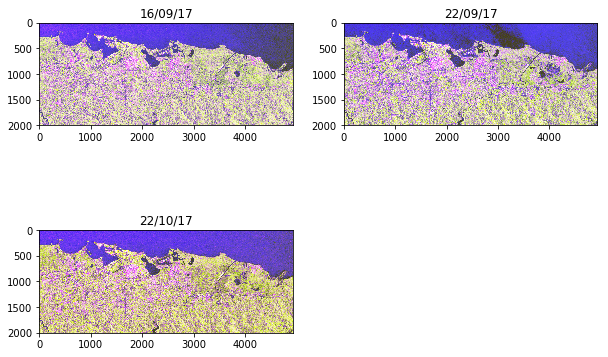

In [2]:
f = plt.figure(figsize = (10,7))
for i,j in enumerate(data.items()):
    f.add_subplot(2,2,i+1)
    plt.imshow(j[1])
    plt.title(j[0])
plt.show()

# Individual Bands

The instrument onboard the Sentinel-1 satellites transmits in one polarisation and measures in two. The first band in each data file is the signal measured in the same polarisation as the transmission and the second is measured in the opposite polarisation.

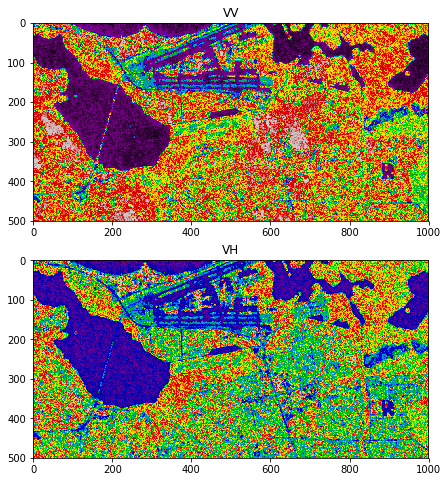

In [3]:
f = plt.figure(figsize = (8,8))
titles = ['VV','VH']

# select a subregion
im = data['22/09/17'][500:1000,2000:3000,:]

for i in range(2):
    f.add_subplot(2,1,i+1)
    plt.imshow(im[:,:,i],'nipy_spectral')
    plt.title(titles[i])
plt.show()

Calculating the ratio of the 2 bands

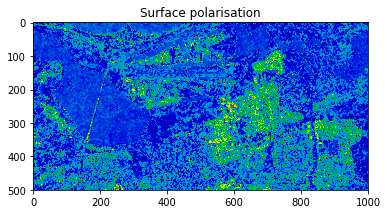

In [4]:
Polarisation_ratio = im[:,:,0]/im[:,:,1]
plt.imshow(Polarisation_ratio,'nipy_spectral')
plt.title('Surface polarisation')
plt.show()